[1. 1. 1. ... 0. 1. 1.]
0.9206877856091705
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89     51523
         1.0       0.90      0.98      0.94     77587

    accuracy                           0.92    129110
   macro avg       0.93      0.90      0.91    129110
weighted avg       0.93      0.92      0.92    129110



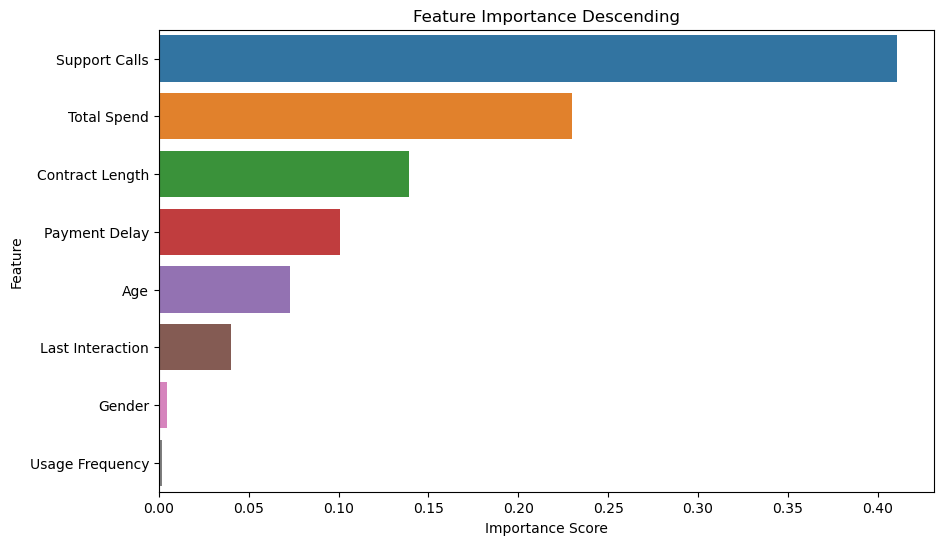

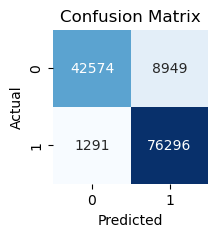

Feature: Support Calls, Importance Score: 0.4106
Feature: Total Spend, Importance Score: 0.2299
Feature: Contract Length, Importance Score: 0.1390
Feature: Payment Delay, Importance Score: 0.1010
Feature: Age, Importance Score: 0.0729
Feature: Last Interaction, Importance Score: 0.0403
Feature: Gender, Importance Score: 0.0047
Feature: Usage Frequency, Importance Score: 0.0015


In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

training_data = pd.read_csv("/Users/kristenoneill/Downloads/archive (2)/customer_churn_dataset-training-master.csv")
testing_data = pd.read_csv("/Users/kristenoneill/Downloads/archive (2)/customer_churn_dataset-testing-master.csv")

consol_data = pd.concat([training_data, testing_data], ignore_index=True)

consol_data['Age'] = (consol_data['Age'] > 50).astype(int)
consol_data['Gender'] = consol_data['Gender'].replace(['Female', 'Male'], [0, 1])
consol_data['Usage Frequency'] = pd.cut(consol_data['Usage Frequency'], bins=[0, 2, 9, float('inf')], labels=[0, 1, 2], right=True)
consol_data['Support Calls'] = pd.cut(consol_data['Support Calls'], bins=[0, 2, 4, float('inf')], labels=[0, 1, 2], right=True)
consol_data['Payment Delay'] = (consol_data['Payment Delay'] <= 20).astype(int)
consol_data['Contract Length'] = (consol_data['Contract Length'] == 'Monthly').astype(int)
consol_data['Total Spend'] = (consol_data['Total Spend'] >= 500).astype(int)
consol_data['Last Interaction'] = (consol_data['Last Interaction'] <= 15).astype(int)

consol_data = consol_data.drop(columns=['CustomerID','Tenure', 'Subscription Type'])
consol_data = consol_data.dropna()

X = consol_data.drop(columns=['Churn'])
y = consol_data['Churn']

X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_training, y_training)

churn_prediction = model.predict(X_testing)

print(churn_prediction)
print(accuracy_score(y_testing, churn_prediction))
print(classification_report(y_testing, churn_prediction))

importance_scores = model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_scores[indices], y=features[indices])
plt.title("Feature Importance Descending")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

conf_matrix = confusion_matrix(y_testing, churn_prediction)

plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()



for feature, score in zip(features[indices], importance_scores[indices]):
    print(f"Feature: {feature}, Importance Score: {score:.4f}")



[1. 1. 1. ... 0. 1. 1.]
0.9206877856091705
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89     51523
         1.0       0.90      0.98      0.94     77587

    accuracy                           0.92    129110
   macro avg       0.93      0.90      0.91    129110
weighted avg       0.93      0.92      0.92    129110



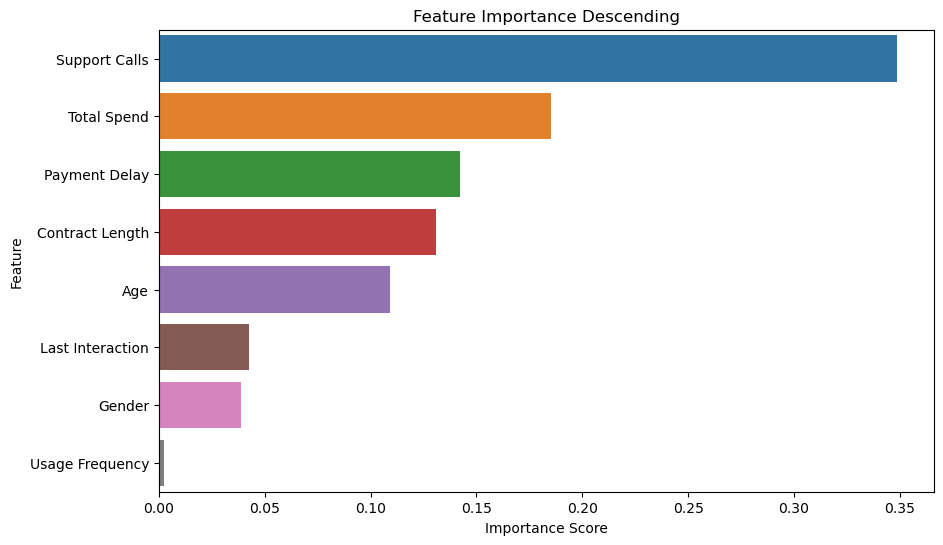

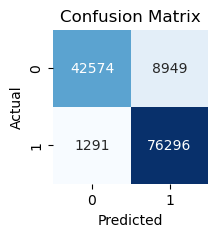

Feature: Support Calls, Importance Score: 0.3486
Feature: Total Spend, Importance Score: 0.1852
Feature: Payment Delay, Importance Score: 0.1421
Feature: Contract Length, Importance Score: 0.1310
Feature: Age, Importance Score: 0.1090
Feature: Last Interaction, Importance Score: 0.0428
Feature: Gender, Importance Score: 0.0387
Feature: Usage Frequency, Importance Score: 0.0025


In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # Switch to RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

training_data = pd.read_csv("/Users/kristenoneill/Downloads/archive (2)/customer_churn_dataset-training-master.csv")
testing_data = pd.read_csv("/Users/kristenoneill/Downloads/archive (2)/customer_churn_dataset-testing-master.csv")

consol_data = pd.concat([training_data, testing_data], ignore_index=True)

consol_data['Age'] = (consol_data['Age'] > 50).astype(int)
consol_data['Gender'] = consol_data['Gender'].replace(['Female', 'Male'], [0, 1])
consol_data['Usage Frequency'] = pd.cut(consol_data['Usage Frequency'], bins=[0, 2, 9, float('inf')], labels=[0, 1, 2], right=True)
consol_data['Support Calls'] = pd.cut(consol_data['Support Calls'], bins=[0, 2, 4, float('inf')], labels=[0, 1, 2], right=True)
consol_data['Payment Delay'] = (consol_data['Payment Delay'] <= 20).astype(int)
consol_data['Contract Length'] = (consol_data['Contract Length'] == 'Monthly').astype(int)
consol_data['Total Spend'] = (consol_data['Total Spend'] >= 500).astype(int)
consol_data['Last Interaction'] = (consol_data['Last Interaction'] <= 15).astype(int)

consol_data = consol_data.drop(columns=['CustomerID','Tenure', 'Subscription Type'])
consol_data = consol_data.dropna()

X = consol_data.drop(columns=['Churn'])
y = consol_data['Churn']

X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_training, y_training)

churn_prediction = model.predict(X_testing)

print(churn_prediction)
print(accuracy_score(y_testing, churn_prediction))
print(classification_report(y_testing, churn_prediction))

importance_scores = model.feature_importances_
features = X.columns
indices = importance_scores.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_scores[indices], y=features[indices])
plt.title("Feature Importance Descending")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

conf_matrix = confusion_matrix(y_testing, churn_prediction)

plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

for feature, score in zip(features[indices], importance_scores[indices]):
    print(f"Feature: {feature}, Importance Score: {score:.4f}")
